# Mod85 Weight Inititalization Assignment

Objective: Assess understanding of weight initialization techniques in artificial neural networks. Evaluate the impact of different initialization methods on model performance. Enhance knowledge of weight initialization's role in improving convergence and avoiding vanishing/exploding gradients.

# Part 1: Understanding Weight Initialization

1. Explain the importance of weight initialization in artificial neural networks. Why is it necessary to initialize
the weights carefully?

A1. Importance of Weight Initialization in Artificial Neural Networks
Weight initialization plays a critical role in how well and how fast a neural network learns. It refers to assigning initial values to the weights before training begins.

- Neural networks learn by adjusting weights to minimize loss.

- If weights are poorly initialized (too small, too large, or all the same), it can slow down learning, prevent convergence, or cause unstable training.

- A good initialization provides a balanced starting point so that gradients flow properly during backpropagation.



2. Describe the challenges associated with improper weight initialization. How do these issues affect model training and convergence?

A2. 2. Challenges of Improper Weight Initialization
Improper initialization can lead to several problems:

### 1. Vanishing Gradients:
- If weights are too small, the outputs of neurons (especially with sigmoid or tanh) are near-zero.

- This causes gradients to shrink, slowing learning or completely stopping it.

### 2. Exploding Gradients:
- If weights are too large, gradients can become extremely large.

- This leads to unstable training, causing the model to diverge or produce NaNs.

### 3. Symmetry Problem:
- If all weights are initialized to the same value, every neuron in a layer learns the same thing.

- This destroys the diversity needed to learn complex features.


3. Discuss the concept of variance and how it relates to weight initialization. Why is it crucial to consider the variance of weights during initialization?

A3. In simple terms, variance is a statistical measure of how spread out numbers are. For neural networks, it refers to the spread of the weight values during initialization.

- A high variance means weight values are spread far from the mean.

- A low variance means they're close to the mean (i.e., very similar).


## Variance in Weight Initialization
When initializing weights in a neural network, maintaining the right variance is crucial because it directly affects:

- The magnitude of activations flowing forward through the network.

- The magnitude of gradients flowing backward during backpropagation.

If not handled properly, it can lead to:

- **Vanishing gradients** (weights too small → activations shrink → gradients disappear).

- **Exploding gradients** (weights too large → activations grow → gradients blow up).


##  Why Is Maintaining Proper Variance Important?
Let’s break it down:

1. **Balanced Activations:**

   - Proper variance ensures that activations don’t die out or explode as they move through layers.

   - This keeps the signal stable and learnable across all layers.

2. **Stable Gradients:**

   - During backpropagation, gradients are calculated layer by layer.

   - A good variance ensures gradients stay within a reasonable range, allowing learning to happen smoothly.

3. **Faster & More Reliable Convergence:**

  - With well-initialized weights, models train faster and are less sensitive to learning rate tuning.





# Part 2: Weight Initialization Technique

4. Explain the concept of zero initialization. Discuss its potential limitations and when it can be appropriate
to use.

A4. Zero initialization means initializing all weights in a neural network to zero at the start of training.
```
weights = tf.Variable(tf.zeros([input_dim, output_dim]))
```

## Why Zero Initialization is a Problem
While this might seem like a reasonable starting point (simple, consistent), it leads to a big issue:

### Symmetry Problem:

- If all weights are initialized to zero, then during forward propagation, all neurons in a layer compute the same output.

- And during backpropagation, they receive identical gradients.

- So they learn the same things — the model fails to break symmetry and becomes useless, no matter how many neurons you have.

**Example:** Imagine 10 neurons in a layer — all start with zero weights, get the same inputs, do the same calculation, and update the same way. They're essentially duplicates of each other.


## When is Zero Initialization Acceptable?

1. **Bias terms only:** It's okay (and common) to initialize biases to zero, because weights (with random initialization) still allow neurons to learn differently.

```
weights = tf.Variable(tf.random.normal([in_dim, out_dim]))
biases = tf.Variable(tf.zeros([out_dim]))
```

2. **For debugging:** Sometimes, you might use zero initialization temporarily to verify shapes and code structure during model development.


5. Describe the process of random initialization. How can random initialization be adjusted to mitigate potential issues like saturation or vanishing/exploding gradients?

A5. Random initialization refers to starting the neural network’s weights with small random values rather than zeros or constants.

## Why random?

- It breaks the symmetry: different neurons learn different features.

- It enables the network to start learning effectively from the beginning.

## The Problem: Not All Randomness is Good
If weights are:

- Too small → Gradients may vanish → Training becomes slow or stuck.

- Too large → Gradients may explode → Training becomes unstable.

- Improperly scaled → Can lead to saturation of activation functions like sigmoid or tanh.


## The Solution: Smart Random Initialization (Using Variance)
To mitigate those issues, random initialization is adjusted using statistical techniques like:


1. Xavier (Glorot) Initialization

  - Used with: sigmoid or tanh activations

  - Ensures that the variance of activations and gradients remains stable across layers.


2. He Initialization

  - Used with: ReLU or Leaky ReLU

  - Takes into account that ReLU discards half the values (negative ones).


## Why This Works
  - These methods control variance flow through the network.

  - Prevent neurons from becoming saturated (where gradients vanish) or overshooting (where gradients explode).


##  In TensorFlow/Keras
Keras makes this easy with built-in initializers:
```
from tensorflow.keras.initializers import HeNormal, GlorotUniform

model.add(Dense(64, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(64, activation='tanh', kernel_initializer=GlorotUniform()))
```

6. Discuss the concept of Xavier/Glorot initialization. Explain how it addresses the challenges of improper
weight initialization and the underlying theory behind it.

A6. Xavier Initialization, also known as Glorot Initialization, is a weight initialization strategy designed to maintain the variance of inputs and outputs across layers.

## Why Do We Need It?
In deep networks, if weights are not properly initialized:

- Too small → activations shrink → vanishing gradients

- Too large → activations grow → exploding gradients

This makes training unstable or even impossible.

## Core Idea Behind Xavier Initialization
To keep the signal (activation and gradient) flow stable, the initialization must ensure:

- Variance of input to a layer = Variance of output

- Variance of gradient at input = Variance of gradient at output

This ensures **consistent learning** across layers.


## How It Helps

1. **Balances Variance:** Keeps variance of inputs and outputs consistent

2. **Prevents Saturation:** Neurons don’t get stuck with near-zero gradients (especially for sigmoid/tanh)

3. **Improves Convergence:** Helps faster and more stable training.


## Use in practice
```
from tensorflow.keras.initializers import GlorotUniform

model.add(Dense(64, activation='tanh', kernel_initializer=GlorotUniform()))
```

It's the default initializer in many Keras layers when using tanh or sigmoid.

## Note:

- Best suited for sigmoid and tanh activation functions.

- For ReLU, use He Initialization (which scales the variance differently).


7. Explain the concept of He initialization. How does it differ from Xavier initialization, and when is it preferred?

A7. He Initialization (also known as Kaiming Initialization) is a method for initializing the weights of neural networks to improve training stability, particularly in networks that use ReLU or its variants (like Leaky ReLU).

## The Core Idea
- He Initialization is designed to preserve the variance of activations across layers — just like Xavier — **but accounts for the properties of ReLU activations, which zero out negative values.**

- Because ReLU drops roughly **half the input activations**, the initialization compensates by using **larger weight variance.**


## How it is different from  Xavier Initialization?

### Xavier:

- Activation function target -> Sigmoid, tanh

- Designed for -> Keeping both forward and backward signal flow stable.

### He:

- Activation function target -> ReLU, Leaky ReLU

- Designed for -> Compensating for ReLU's dead outputs.


## Use in Practice (Keras / TensorFlow)

```
from tensorflow.keras.initializers import HeNormal

model.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
```

This is often the default initializer when using relu in Keras.

## When to Use He Initialization
Use He Initialization when:

- Your model uses ReLU, Leaky ReLU, Parametric ReLU, etc.

- You're training deep feedforward or CNN models

It generally leads to **faster convergence** and **better accuracy** than Xavier with ReLU-based networks.

# Part 3: Applying Weight Initialization

8. Implement different weight initialization techniques (zero initialization, random initialization, Xavier initialization, and He initialization) in a neural network using a framework of your choice. Train the model
on a suitable dataset and compare the performance of the initialized models.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training with Zero initialization...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with Random initialization...
Training with Xavier initialization...
Training with He initialization...


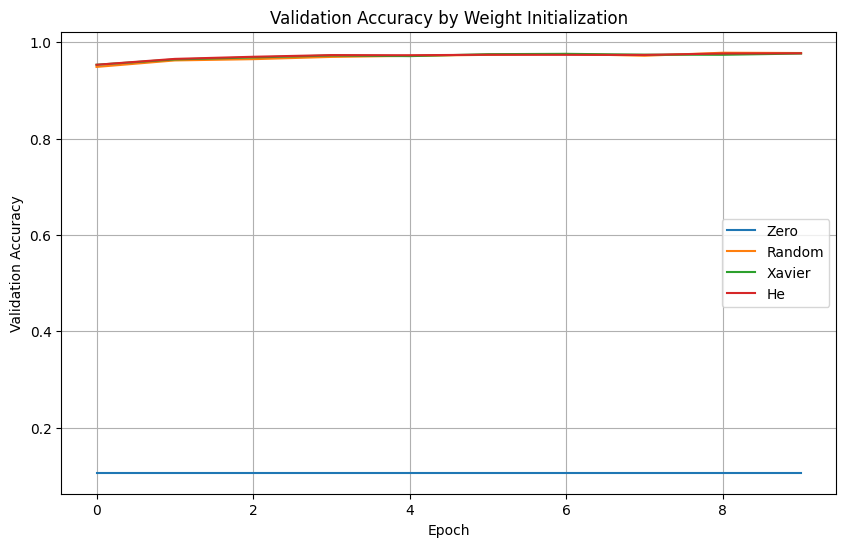

Final validation accuracies:
Epoch        9
Zero    0.1064
Random  0.9775
Xavier  0.9764
He      0.9769


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import Zeros, RandomNormal, GlorotNormal, HeNormal
import matplotlib.pyplot as plt
import pandas as pd

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_val = x_train[:50000] / 255.0, x_train[50000:] / 255.0
y_train, y_val = y_train[:50000], y_train[50000:]

x_test = x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_val_cat = to_categorical(y_val, 10)
y_test_cat = to_categorical(y_test, 10)

# Define model creation function
def create_model(initializer):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_initializer=initializer),
        Dense(64, activation='relu', kernel_initializer=initializer),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Test different initializers
initializers = {
    'Zero': Zeros(),
    'Random': RandomNormal(mean=0.0, stddev=0.05),
    'Xavier': GlorotNormal(),
    'He': HeNormal()
}

histories = {}
for name, init in initializers.items():
    print(f"Training with {name} initialization...")
    model = create_model(init)
    history = model.fit(x_train, y_train_cat, epochs=10, batch_size=128,
                        validation_data=(x_val, y_val_cat), verbose=0)
    histories[name] = history.history

histories_df = pd.DataFrame({key: val['val_accuracy'] for key, val in histories.items()})
histories_df.index.name = 'Epoch'

histories_df.plot(figsize=(10, 6), title='Validation Accuracy by Weight Initialization')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

print("Final validation accuracies:")
print(histories_df.tail(1).T)


9. Discuss the considerations and tradeoffs when choosing the appropriate weight initialization technique for a given neural network architecture and task.

A9. When choosing a weight initialization technique for a neural network, your decision can significantly impact how well (and how quickly) your model learns. Here are the key considerations and tradeoffs to keep in mind:

## 1.) Type of Activation Function

1. ReLU / Leaky ReLU:

  - Use: He Initialization

  - Why: He initialization is designed to keep the variance of activations stable in deep networks using ReLU-like activations.

2. Sigmoid / tanh:

  - Use: Xavier (Glorot) Initialization

  - Why: Xavier assumes symmetric activations and helps prevent saturation by balancing the flow of gradients.


## 2.) Depth of the Network

1. Shallow Networks:

   - Random initialization or even Xavier may suffice.

2. Deep Networks:

   - Require better initialization (e.g., He or Xavier) to avoid vanishing/exploding gradients.


## 3.) Risk of Vanishing or Exploding Gradients

   - Too small weights → Gradients vanish → No learning

   - Too large weights → Exploding gradients → Unstable updates

   - Proper initialization (like Xavier or He) helps mitigate both issues by maintaining variance across layers.

## 4.) Nature of the Task

1. Classification Tasks (Softmax Output):

  - Xavier is often a good starting point.

2. Regression Tasks:

    - Custom initialization might be useful, especially if outputs are expected within certain ranges.


## 5.) Learning Stability and Speed

1. Zero Initialization:

   - Leads to symmetry problem (all neurons learn the same thing) → Bad idea in hidden layers.

2. Random Initialization:

  - Works better, but unscaled variance can still cause training instability.

3. He / Xavier:

  - Designed to speed up convergence by stabilizing gradient flow.

## 6.) When it Can Go Wrong

  - **He Initialization + Sigmoid:** May cause exploding activations due to mismatch.

  - **Xavier + ReLU:** Sometimes not enough variance; leads to slower learning.
